In [1]:
!pwd

/home/zhimin90/DePaul/DSC468/Project/Model


In [2]:
CSV_PATH = "/home/zhimin90/DePaul/DSC468/Project/Asset/CSV/"

In [3]:
from sodapy import Socrata
import pandas as pd
import numpy as np
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ijzp-q8t2",order="date DESC", limit=100000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.iloc[0:99,-20:-1]

date                        block  iucr  \
0   2020-04-29T23:53:00.000           057XX S KEDZIE AVE  1310   
1   2020-04-29T23:41:00.000            065XX S MORGAN ST  2028   
2   2020-04-29T23:35:00.000          069XX S CORNELL AVE  0560   
3   2020-04-29T23:30:00.000           012XX W LOYOLA AVE  0486   
4   2020-04-29T23:30:00.000          006XX W HARRISON ST  0820   
..                      ...                          ...   ...   
94  2020-04-29T17:45:00.000         050XX N WINTHROP AVE  2031   
95  2020-04-29T17:42:00.000              001XX E 71ST ST  0420   
96  2020-04-29T17:40:00.000         038XX W AUGUSTA BLVD  1320   
97  2020-04-29T17:30:00.000           051XX S ARCHER AVE  1156   
98  2020-04-29T17:30:00.000  026XX W LITHUANIAN PLAZA CT  0610   

          primary_type                              description  \
0      CRIMINAL DAMAGE                              TO PROPERTY   
1            NARCOTICS                POSSESS - SYNTHETIC DRUGS   
2              ASSAULT                                   SIMPLE   
3              BATTERY                  DOMESTIC BATTERY SIMPLE   
4                THEFT                           $500 AND UNDER   
..                 ...                                      ...   
94           NARCOTICS                POSSESS - METHAMPHETAMINE   
95             BATTERY  AGGRAVATED - KNIFE / CUTTING INSTRUMENT   
96     CRIMINAL DAMAGE                               TO VEHICLE   
97  DECEPTIVE PRACTICE       ATTEMPT - FINANCIAL IDENTITY THEFT   
98            BURGLARY                           FORCIBLE ENTRY   

   location_description  arrest  domestic  beat district ward community_area  \
0            RESTAURANT   False     False  0824      008   14             63   
1                STREET    True     False  0723      007    6             68   
2             APARTMENT   False     False  0332      003    5             43   
3             APARTMENT    True      True  2432      024   49              1   
4                STREET   False     False  0124      001   25             28   
..                  ...     ...       ...   ...      ...  ...            ...   
94               STREET    True     False  2033      020   48              3   
95             SIDEWALK   False     False  0322      003    6             69   
96               STREET   False     False  1112      011   37             23   
97            APARTMENT   False     False  0815      008   23             57   
98            RESIDENCE   False     False  0831      008   17             66   

   fbi_code x_coordinate y_coordinate  year               updated_on  \
0        14      1156029      1866393  2020  2020-05-06T15:54:51.000   
1        18      1170767      1861556  2020  2020-05-06T15:54:51.000   
2       08A      1188548      1859365  2020  2020-05-06T15:54:51.000   
3       08B      1166821      1943806  2020  2020-05-06T15:54:51.000   
4        06      1172257      1897564  2020  2020-05-06T15:54:51.000   
..      ...          ...          ...   ...                      ...   
94       18      1167953      1933951  2020  2020-05-06T15:54:51.000   
95      04B      1178567      1857978  2020  2020-05-06T15:54:51.000   
96       14      1150286      1906392  2020  2020-05-06T15:54:51.000   
97       11      1147748      1870322  2020  2020-05-06T15:54:51.000   
98       05      1160109      1858800  2020  2020-05-06T15:54:51.000   

        latitude      longitude  
0   41.789168928  -87.703434226  
1    41.77558662  -87.649535828  
2   41.769167875  -87.584423262  
3   42.001371853  -87.661641223  
4   41.874363279  -87.643013039  
..           ...            ...  
94  41.974305063  -87.657762776  
95   41.76559446  -87.621050648  
96  41.899044818  -87.723450648  
97  41.800113194  -87.733697822  
98  41.768249668  -87.688682825  

[99 rows x 19 columns]

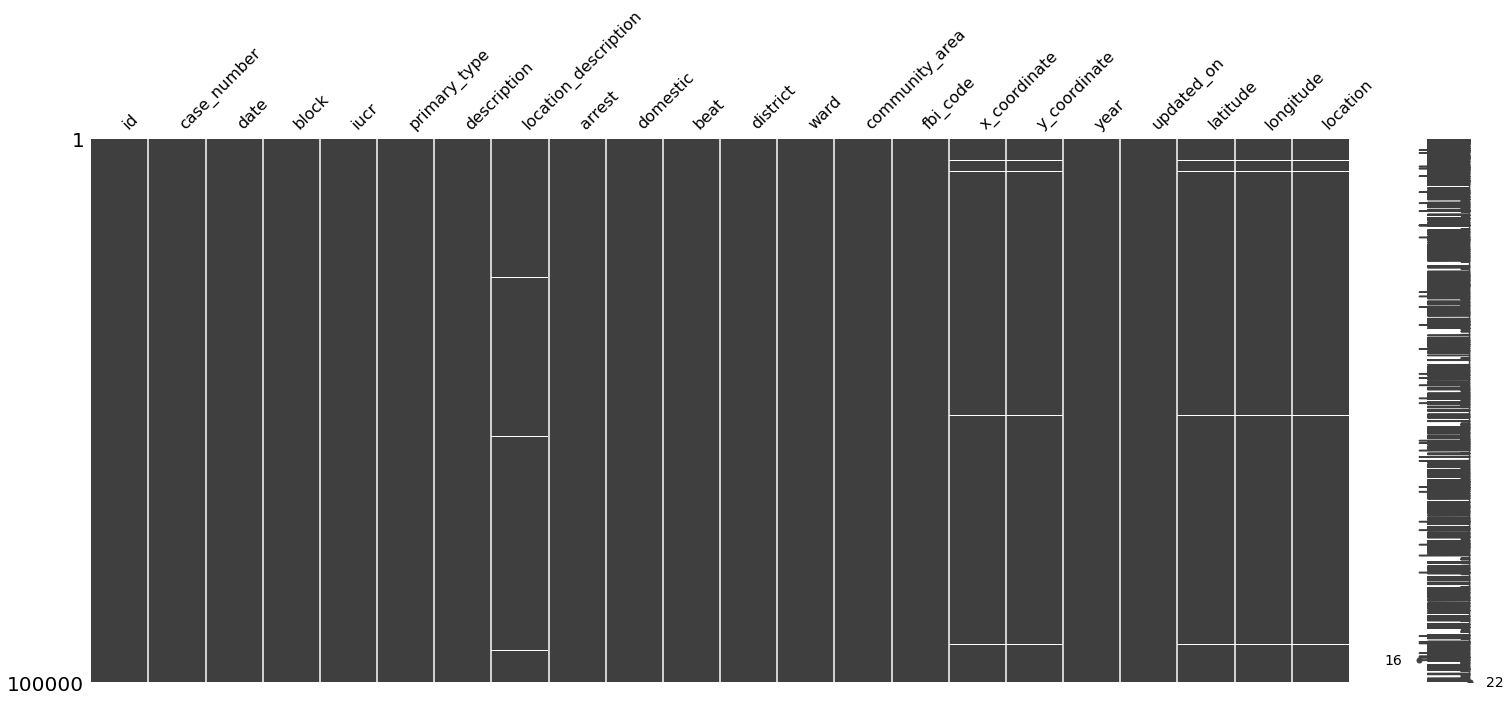

In [5]:
#plot missing variables list
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(results_df)
plt.show()

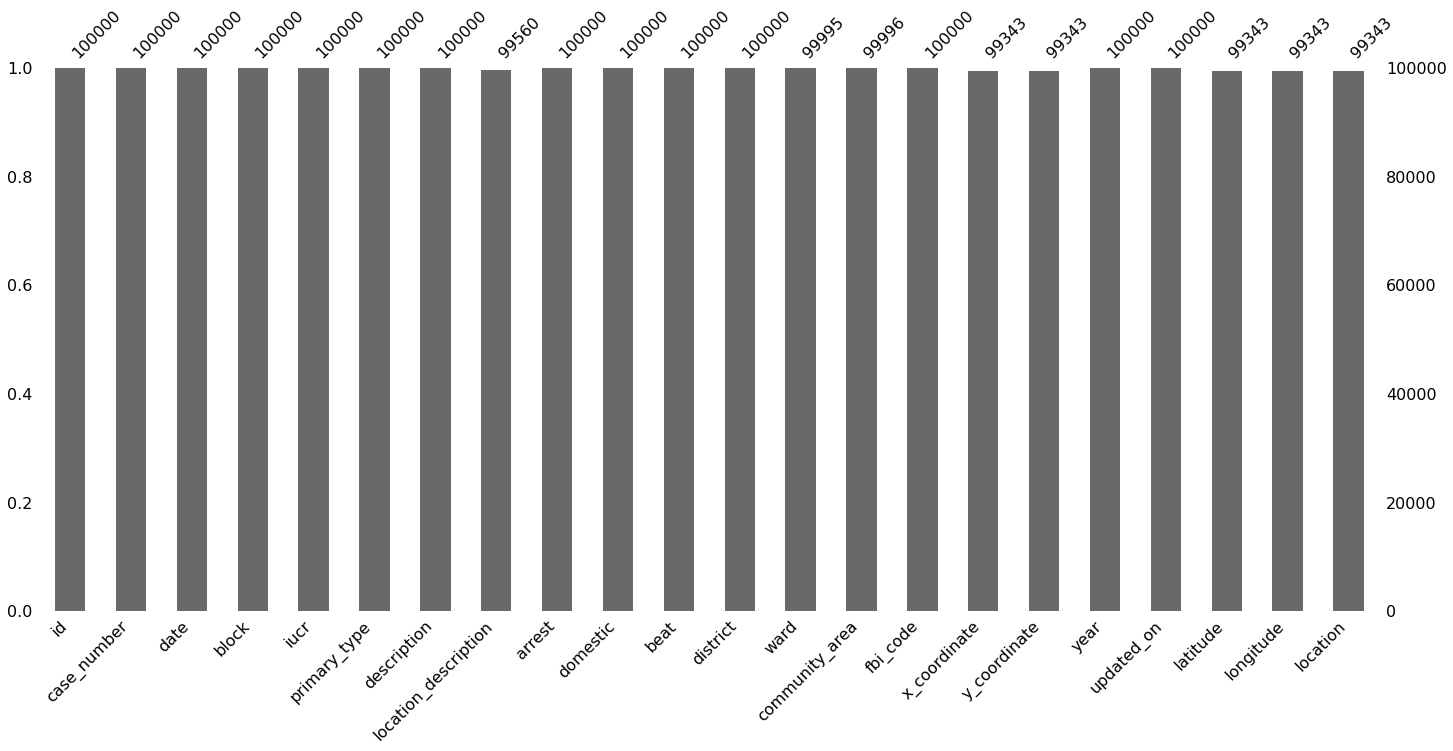

In [6]:
msno.bar(results_df) 

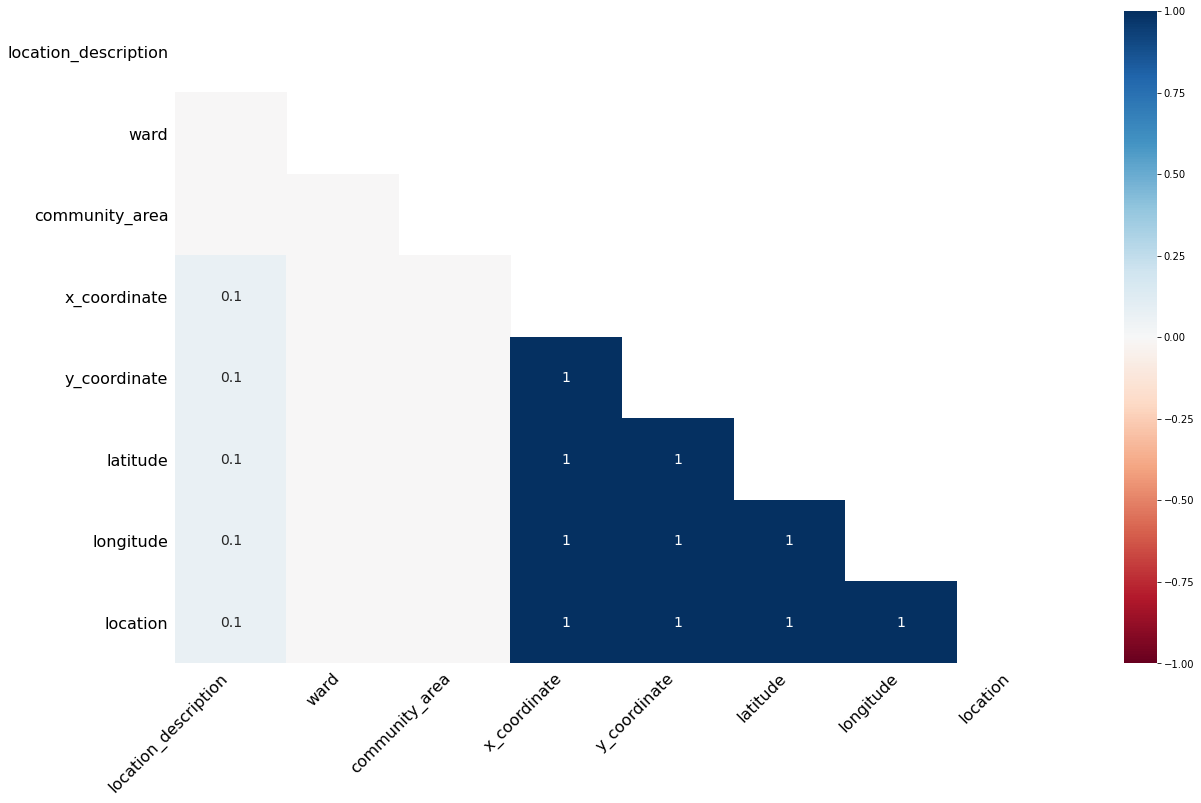

In [7]:
msno.heatmap(results_df) 

In [8]:
results_df.primary_type.value_counts()

THEFT                                23433
BATTERY                              19543
CRIMINAL DAMAGE                      10502
ASSAULT                               7994
DECEPTIVE PRACTICE                    6848
OTHER OFFENSE                         6381
NARCOTICS                             4801
MOTOR VEHICLE THEFT                   3861
BURGLARY                              3777
ROBBERY                               3522
WEAPONS VIOLATION                     2724
CRIMINAL TRESPASS                     2625
OFFENSE INVOLVING CHILDREN             965
INTERFERENCE WITH PUBLIC OFFICER       523
SEX OFFENSE                            492
PUBLIC PEACE VIOLATION                 457
CRIM SEXUAL ASSAULT                    302
CRIMINAL SEXUAL ASSAULT                301
HOMICIDE                               215
PROSTITUTION                           188
ARSON                                  174
STALKING                                76
KIDNAPPING                              67
LIQUOR LAW 

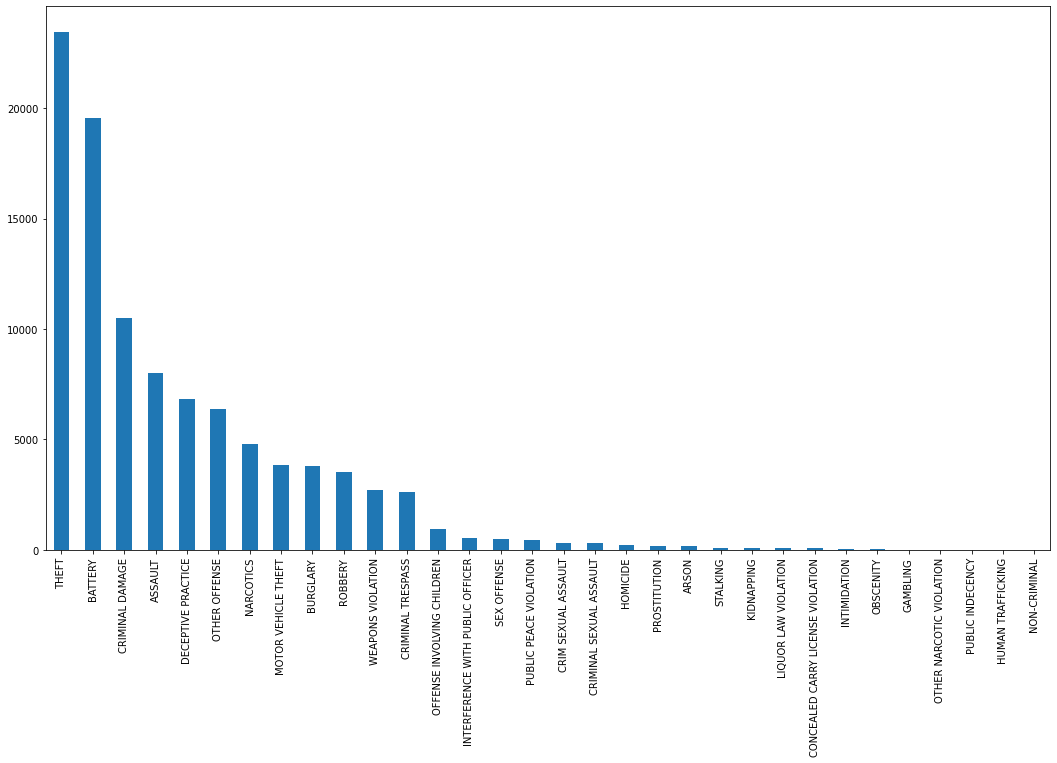

In [9]:
results_df.primary_type.value_counts().plot.bar(figsize=(18,10))

In [10]:
print(max(results_df.date))
print(min(results_df.date))

2020-04-29T23:53:00.000
2019-11-09T02:05:00.000


In [11]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [12]:
test_df = results_df
test_df = test_df[test_df.latitude.notna()].sort_values(['date'], ascending=[0])
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['updated_on'] = pd.to_datetime(test_df['updated_on'])
test_df['latitude'] = pd.to_numeric(test_df['latitude'])
test_df['longitude'] = pd.to_numeric(test_df['longitude'])

df = test_df
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [13]:
print(max(test_df['latitude']))
print(min(test_df['latitude']))
print(max(test_df['longitude']))
print(min(test_df['longitude']))

42.022547568
36.619446395
-87.524618154
-91.686565684


In [14]:
print(max(test_df['date']))
print(min(test_df['date']))

2020-04-29 23:53:00
2019-11-09 02:05:00


In [15]:
map_arr = []
interval_int = 30 #use 30 days data to predict next 7 days
series_range = 7 #days
time_interval = timedelta(days=interval_int)
date_start = min(df['date'])
date_end = max(df['date'])

geo_price_map = df[['date', 'primary_type','latitude', 'longitude']]

In [16]:
filter1a = pd.to_numeric(geo_price_map['longitude']) > xbound[0]
filter1b = pd.to_numeric(geo_price_map['longitude']) < xbound[1]
filter1c = pd.to_numeric(geo_price_map['latitude']) > ybound[0]
filter1d = pd.to_numeric(geo_price_map['latitude']) < ybound[1]
print("sum of remaining is: " + str(sum(filter1a&filter1b&filter1c&filter1d)))
geo_price_map = geo_price_map[filter1a&filter1b&filter1c&filter1d]

sum of remaining is: 99339


In [17]:
print(max(geo_price_map['latitude']))
print(min(geo_price_map['latitude']))
print(max(geo_price_map['longitude']))
print(min(geo_price_map['longitude']))

42.022547568
41.645050759
-87.524618154
-87.934567226


In [18]:
for int_cur_date in range(0, (date_end - date_start).days - interval_int, int(series_range)):
#for int_start_date in range(365, 565, interval_int):
    geo_price_map_filtered = geo_price_map[geo_price_map['longitude'].notnull()]
    
    #filter2 = geo_price_map_filtered['REQUEST_DATE'] > (date_start + timedelta(days=int_start_date))
    #filter3 = geo_price_map_filtered['REQUEST_DATE'] <= (date_start + timedelta(days=int_start_date+interval_int))
    
    filter2 = geo_price_map_filtered['date'] > (date_end - timedelta(days=int_cur_date+interval_int))
    filter3 = geo_price_map_filtered['date'] <= (date_end -  timedelta(days=int_cur_date))
    
    print(date_end - timedelta(days=int_cur_date+interval_int))
    print(date_end -  timedelta(days=int_cur_date))
    
    
    geo_price_map_filtered = geo_price_map_filtered.where(filter2 & filter3)
    print("crime count: " + str(geo_price_map_filtered.notnull().sum()))
    
    print("_"*20)
    map_arr.append(geo_price_map_filtered)

2020-03-30 23:53:00
2020-04-29 23:53:00
crime count: date            11965
primary_type    11965
latitude        11965
longitude       11965
dtype: int64
____________________
2020-03-23 23:53:00
2020-04-22 23:53:00
crime count: date            12312
primary_type    12312
latitude        12312
longitude       12312
dtype: int64
____________________
2020-03-16 23:53:00
2020-04-15 23:53:00
crime count: date            12694
primary_type    12694
latitude        12694
longitude       12694
dtype: int64
____________________
2020-03-09 23:53:00
2020-04-08 23:53:00
crime count: date            14046
primary_type    14046
latitude        14046
longitude       14046
dtype: int64
____________________
2020-03-02 23:53:00
2020-04-01 23:53:00
crime count: date            15330
primary_type    15330
latitude        15330
longitude       15330
dtype: int64
____________________
2020-02-24 23:53:00
2020-03-25 23:53:00
crime count: date            16423
primary_type    16423
latitude        16423
longit

In [19]:
map_arr.reverse()

In [20]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [21]:
for geo_price_map in map_arr:
    geo_price_map = geo_price_map[geo_price_map['date'].notnull()]
    print(max(geo_price_map['latitude']))
    print(min(geo_price_map['latitude']))
    print(max(geo_price_map['longitude']))
    print(min(geo_price_map['longitude']))
    print(max(geo_price_map['latitude']) < ybound[1])
    print(min(geo_price_map['latitude']) > ybound[0])
    print(max(geo_price_map['longitude']) < xbound[1])
    print(min(geo_price_map['longitude']) > xbound[0])
    print("-"*20)
    

42.022547568
41.645795846999995
-87.52527447799999
-87.917644638
True
True
True
True
--------------------
42.022547568
41.647038441999996
-87.52703753799999
-87.917644638
True
True
True
True
--------------------
42.022547568
41.647038441999996
-87.52703753799999
-87.917644638
True
True
True
True
--------------------
42.022547568
41.647038441999996
-87.52703753799999
-87.917644638
True
True
True
True
--------------------
42.022547568
41.645903849
-87.52703753799999
-87.917644638
True
True
True
True
--------------------
42.022547568
41.645903849
-87.525806046
-87.934567226
True
True
True
True
--------------------
42.022547568
41.645903849
-87.525806046
-87.934567226
True
True
True
True
--------------------
42.022547568
41.645903849
-87.525663419
-87.934567226
True
True
True
True
--------------------
42.022547189
41.645050759
-87.525427902
-87.934567226
True
True
True
True
--------------------
42.022547189
41.645050759
-87.525427902
-87.92226601
True
True
True
True
--------------------
42

In [22]:
#print last slide of the time aggregated list of dataframe
map_arr[-1][map_arr[-1]['date'].notnull()]

date        primary_type   latitude  longitude
0     2020-04-29 23:53:00     CRIMINAL DAMAGE  41.789169 -87.703434
1     2020-04-29 23:41:00           NARCOTICS  41.775587 -87.649536
2     2020-04-29 23:35:00             ASSAULT  41.769168 -87.584423
5     2020-04-29 23:30:00            BURGLARY  41.777667 -87.781806
6     2020-04-29 23:30:00             BATTERY  41.891539 -87.753029
...                   ...                 ...        ...        ...
12125 2020-03-31 00:09:00         SEX OFFENSE  41.744360 -87.546676
12126 2020-03-31 00:01:00               THEFT  41.791309 -87.692511
12127 2020-03-31 00:01:00     CRIMINAL DAMAGE  41.870129 -87.662881
12128 2020-03-31 00:00:00     CRIMINAL DAMAGE  41.789345 -87.671747
12129 2020-03-30 23:55:00  DECEPTIVE PRACTICE  42.017112 -87.679058

[11965 rows x 4 columns]

(-87.85041986215067, -87.52523350043245)
(41.65924455069546, 42.019245840973895)


(-87.85041986215067, -87.52523350043245, 41.65924455069546, 42.019245840973895)

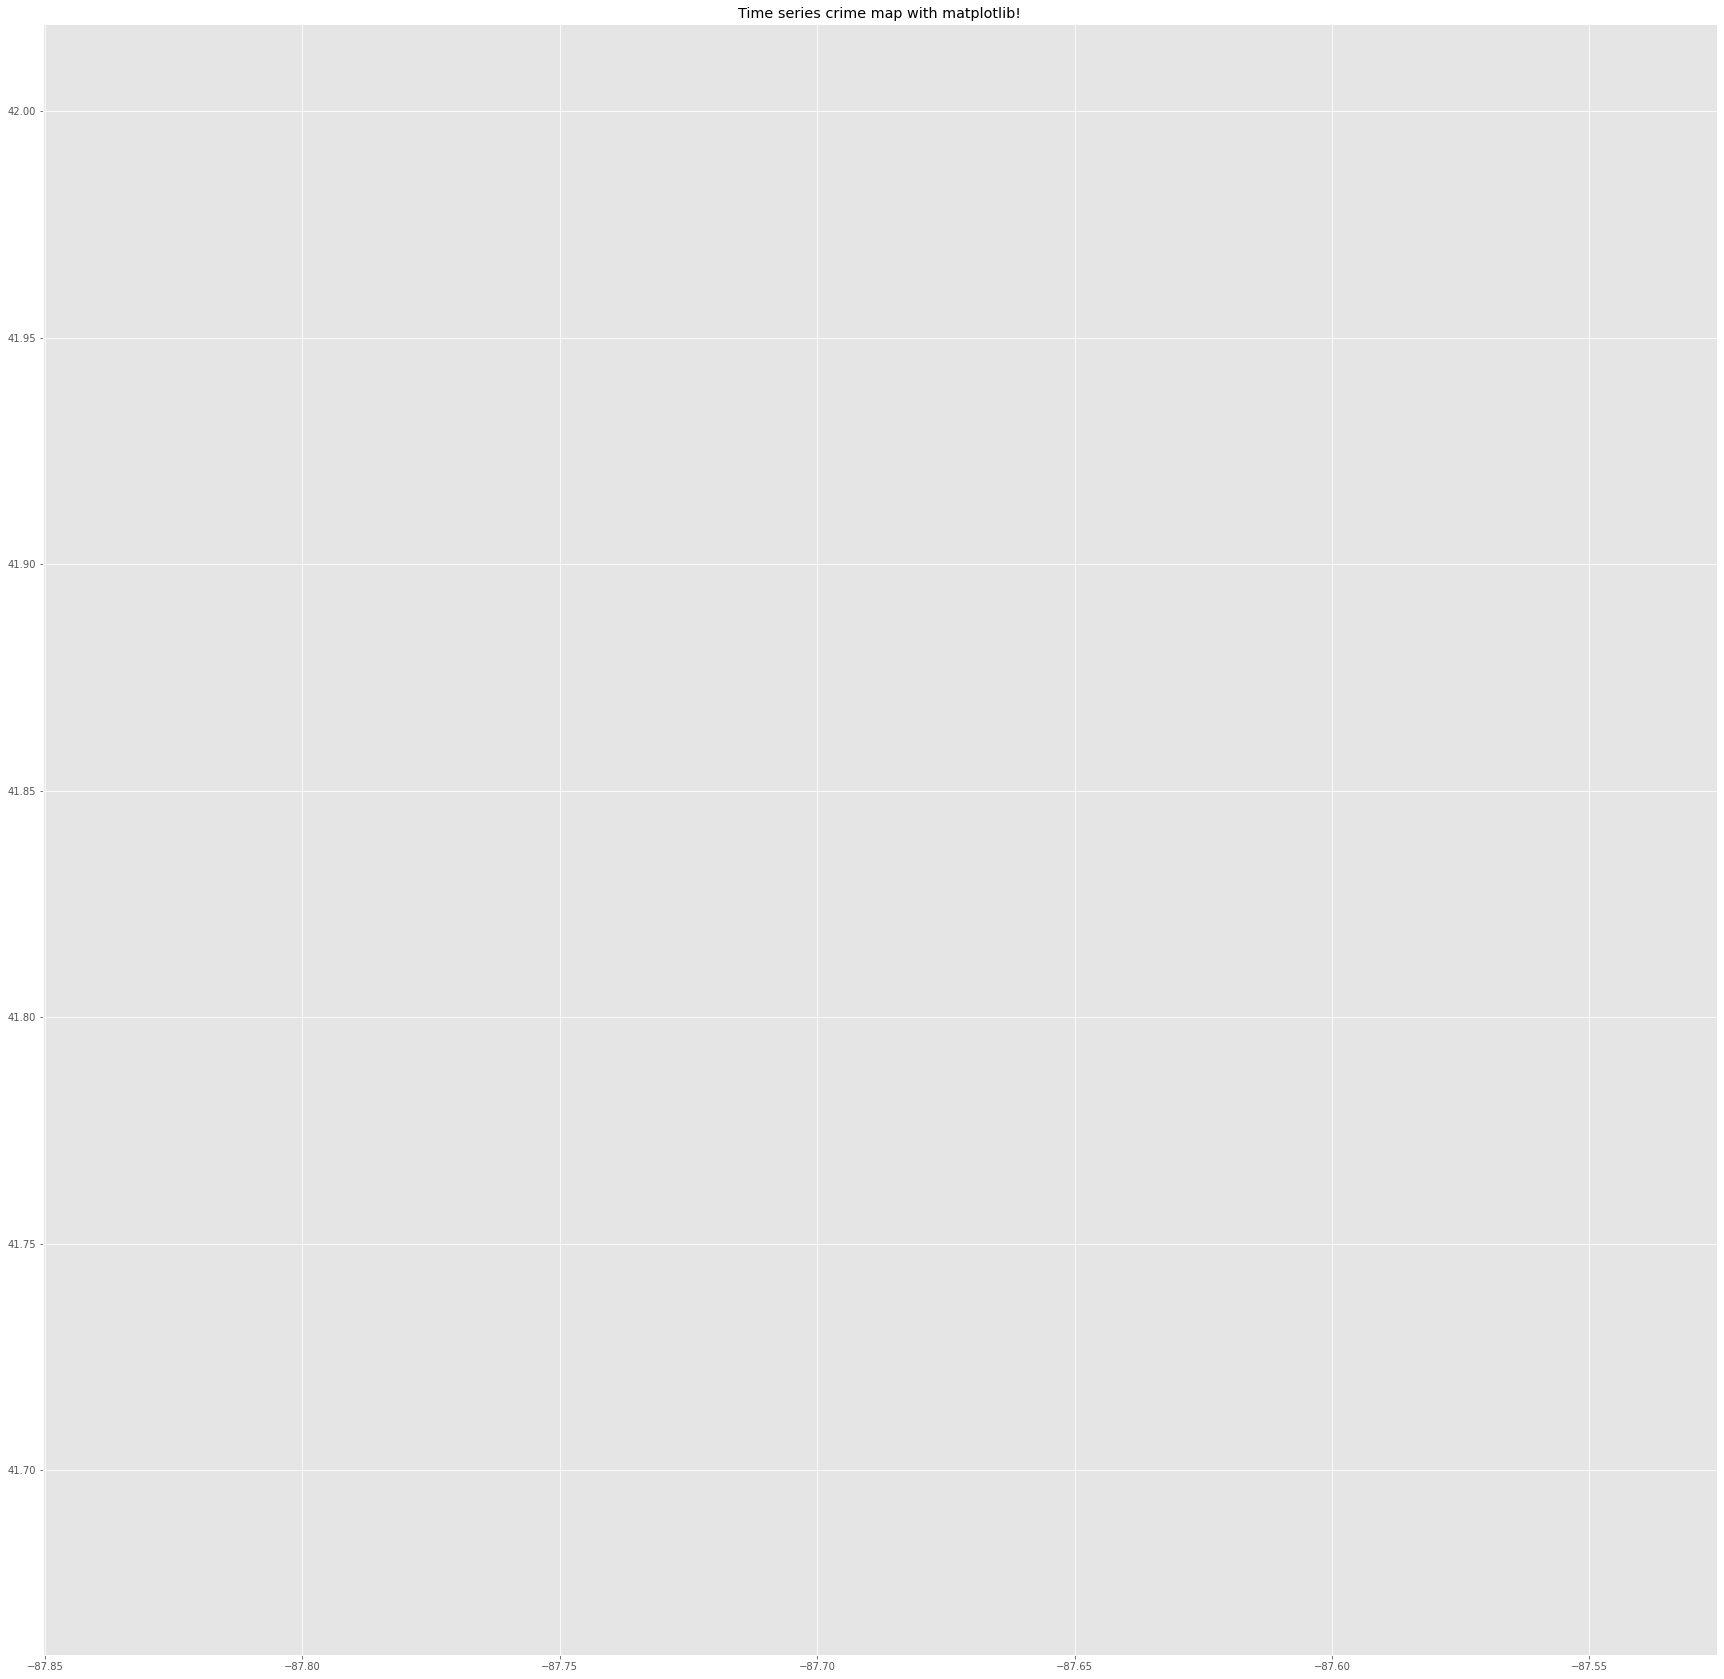

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams["figure.figsize"] = [30, 30]

df = map_arr[-1]
xdata = df["longitude"].dropna().to_numpy()
ydata = df["latitude"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))


xlim = (-87.85041986215067, -87.52523350043245)
ylim = (41.65924455069546, 42.019245840973895)

print(xlim)
print(ylim)

fig = plt.figure()
#plt.scatter(xdata,ydata)
ax = plt.axes(xlim=xlim, ylim=ylim) 
#ax.set_facecolor((1.0, 0.47, 0.42))
sct, = plt.plot([], [],'o', color='red', lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    sct.set_data([], [])
    return sct,

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i):
    df = map_arr[i]
    xdata = df["longitude"].dropna().to_numpy()
    ydata = df["latitude"].dropna().to_numpy()
    sct.set_data(xdata,ydata)
    return sct,

# setting a title for the plot 
plt.title('Time series crime map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
#anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.arange(0,len(map_arr),1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
#anim.save(CSV_PATH + 'crime_locations_2020.gif', writer='imagemagick') 

In [24]:
from scipy import stats as st
from scipy.stats import gaussian_kde as gaussian_kde
import numpy as np
from KDEpy import FFTKDE, NaiveKDE


def get_kde( x, y, xmin, xmax, ymin, ymax, xx, yy, positions):

    values = np.array([x, y]).T
    #values = values.reshape(values.shape[1], values.shape[0])
    #print("values is: " + str(values))
    #grid, points = get_kernel(values)
    points = get_kernel(values, positions)
    #kernel.set_bandwidth(bw_method=kernel.factor / 30.)
    f = np.reshape(points, xx.shape)
    #print(points.shape)
    #print(grid)
    #return grid, f
    return f

def get_kernel(data, positions):
    #print(data.shape)
    #print(data)
    estimator = FFTKDE(kernel='gaussian', norm=2, bw=0.001)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    points = estimator.fit(data, weights=None).evaluate(positions)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    #kernel = gaussian_kde(dataset=values, bw_method="silverman" )
    #return grid, points
    return points

In [25]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [26]:
grid_size = 1000
density_matrix_t_series = []
# Define the borders
x = [-87.9361,-87.5245]
y = [41.6447,42.023]
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

xx, yy = np.mgrid[xmin:xmax:(grid_size*1j), ymin:ymax:(grid_size*1j)]
positions = np.dstack([xx.ravel(), yy.ravel()])
positions = positions.reshape(positions.shape[1], positions.shape[2])
grid_matrix = positions

In [27]:
for i, df in enumerate(map_arr):
    if df["longitude"].count() > 400:
        #grid, points = get_kde(df["LONGITUDE"].dropna().to_numpy(), df["LATITUDE"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        points = get_kde(df["longitude"].dropna().to_numpy(), df["latitude"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        density_matrix_t_series.append(points)
        print("@" + str(i))

@0
@1
@2
@3
@4
@5
@6
@7
@8
@9
@10
@11
@12
@13
@14
@15
@16
@17
@18
@19
@20


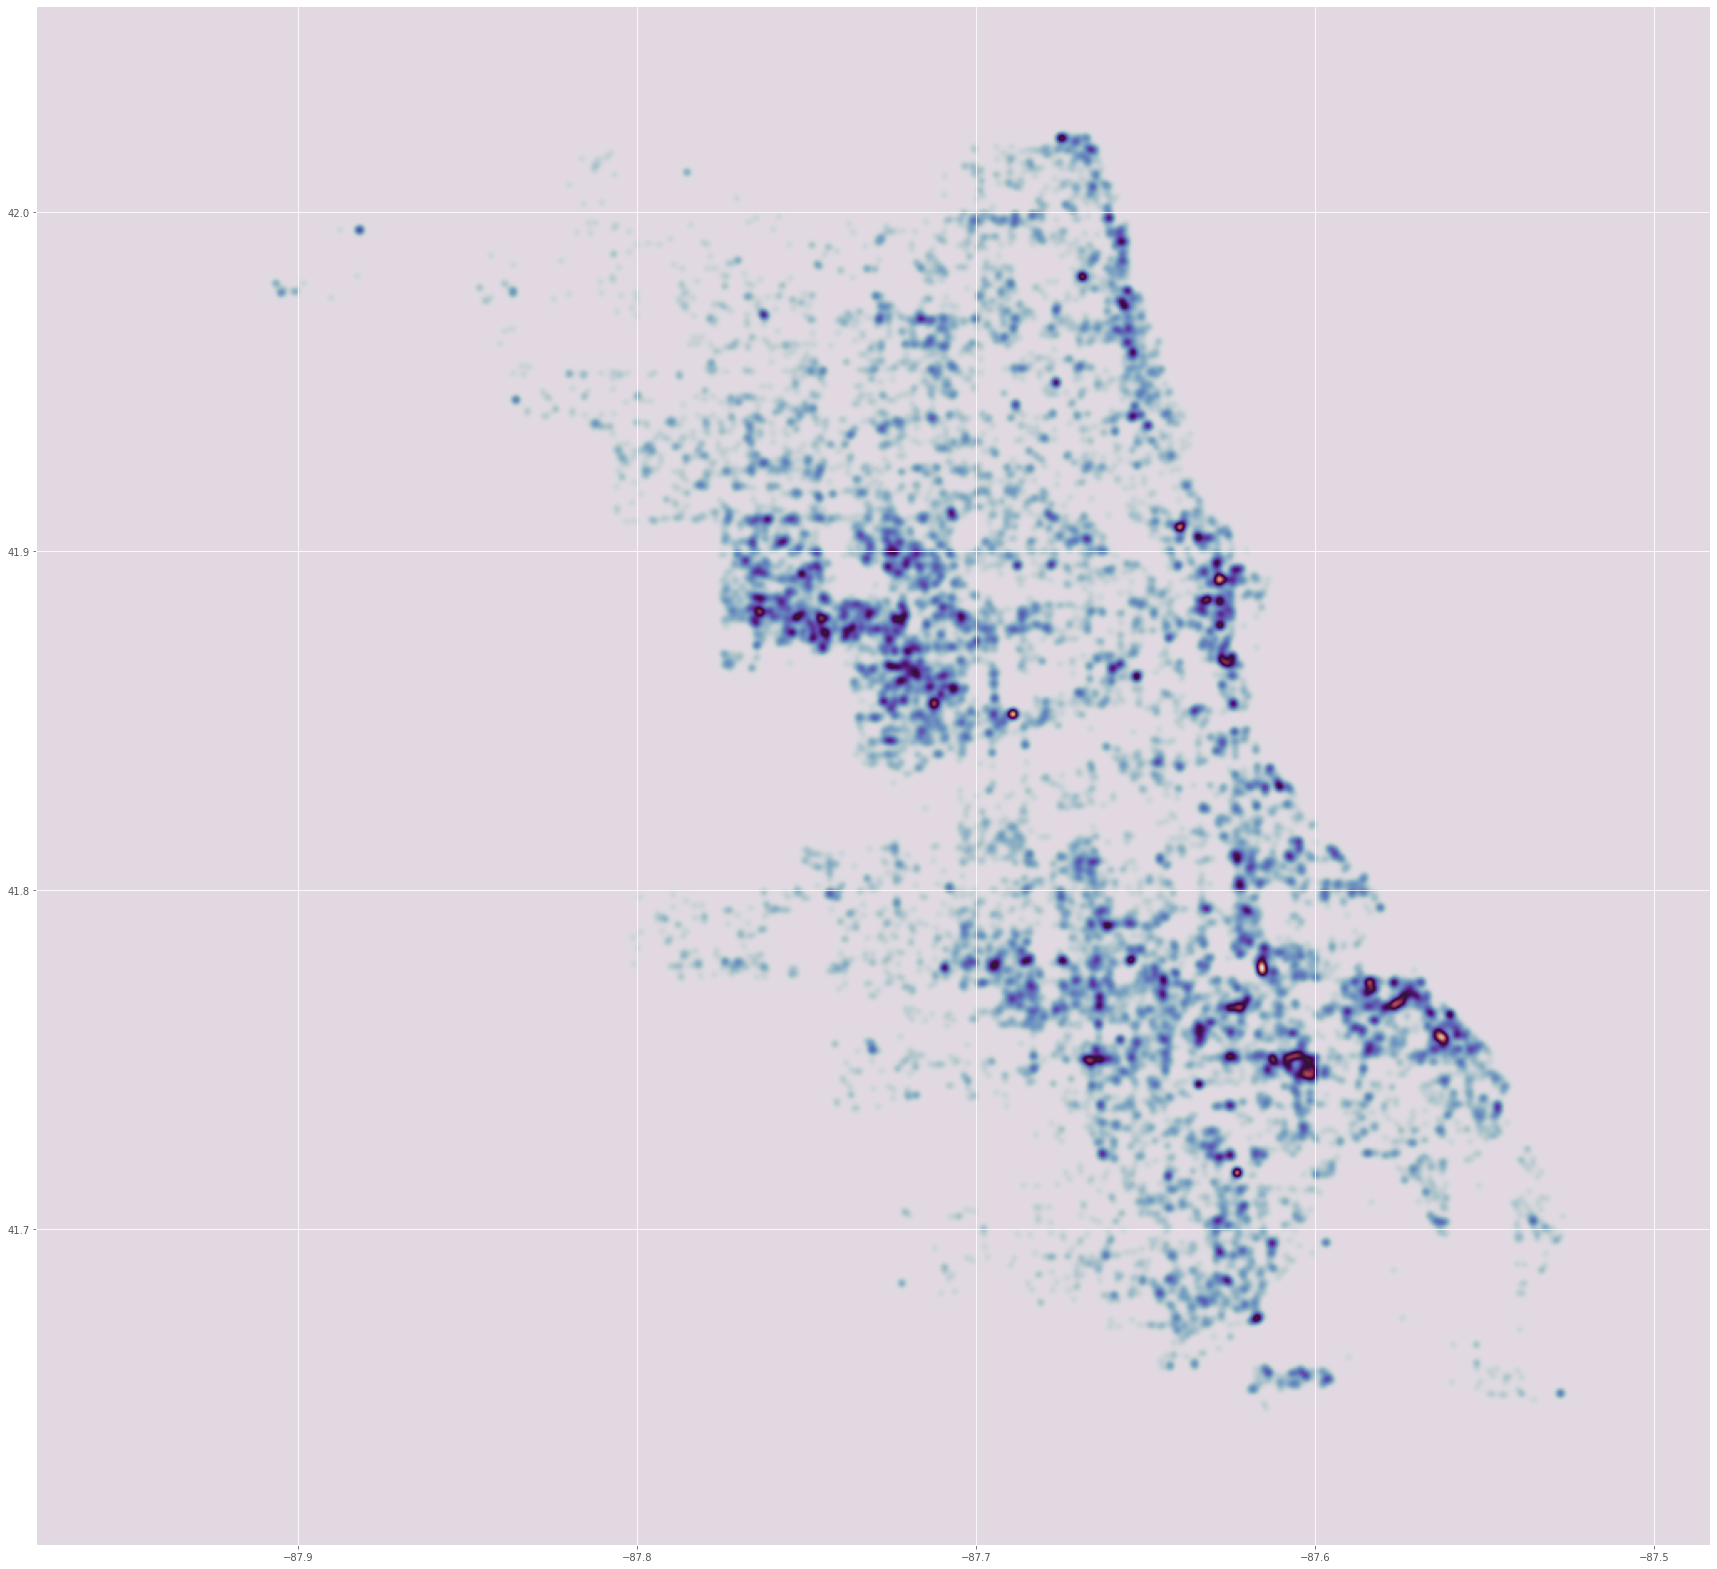

In [28]:
plt.imshow( X=np.rot90(density_matrix_t_series[-1]), cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])

In [29]:
density_matrix_t_series[0].shape

(1000, 1000)

In [30]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler()
scaler2 = MinMaxScaler()
dm_series_np = np.array(density_matrix_t_series)
flattened_matrix_np = np.reshape(dm_series_np, (dm_series_np.shape[0]*dm_series_np.shape[1], dm_series_np.shape[1]))

normalized_matrices = scaler.fit_transform(flattened_matrix_np)
normalized_matrices = scaler2.fit_transform(normalized_matrices)

inverseTcheck = scaler2.inverse_transform(normalized_matrices)
inverseTcheck = scaler.inverse_transform(inverseTcheck)

In [31]:
#This shape is for LSTM model input
normalized_matrices.shape

(21000, 1000)

In [32]:
data2 = normalized_matrices.reshape((int(normalized_matrices.shape[0]/normalized_matrices.shape[1]), normalized_matrices.shape[1], normalized_matrices.shape[1]))
data2.shape

(21, 1000, 1000)

In [33]:
iterable = [np.rot90(matrix) for matrix in data2]

(-87.906864845, -87.526516836)
(41.647038308, 42.022536591)


(-87.97726, -87.48334, 41.60687, 42.06083)

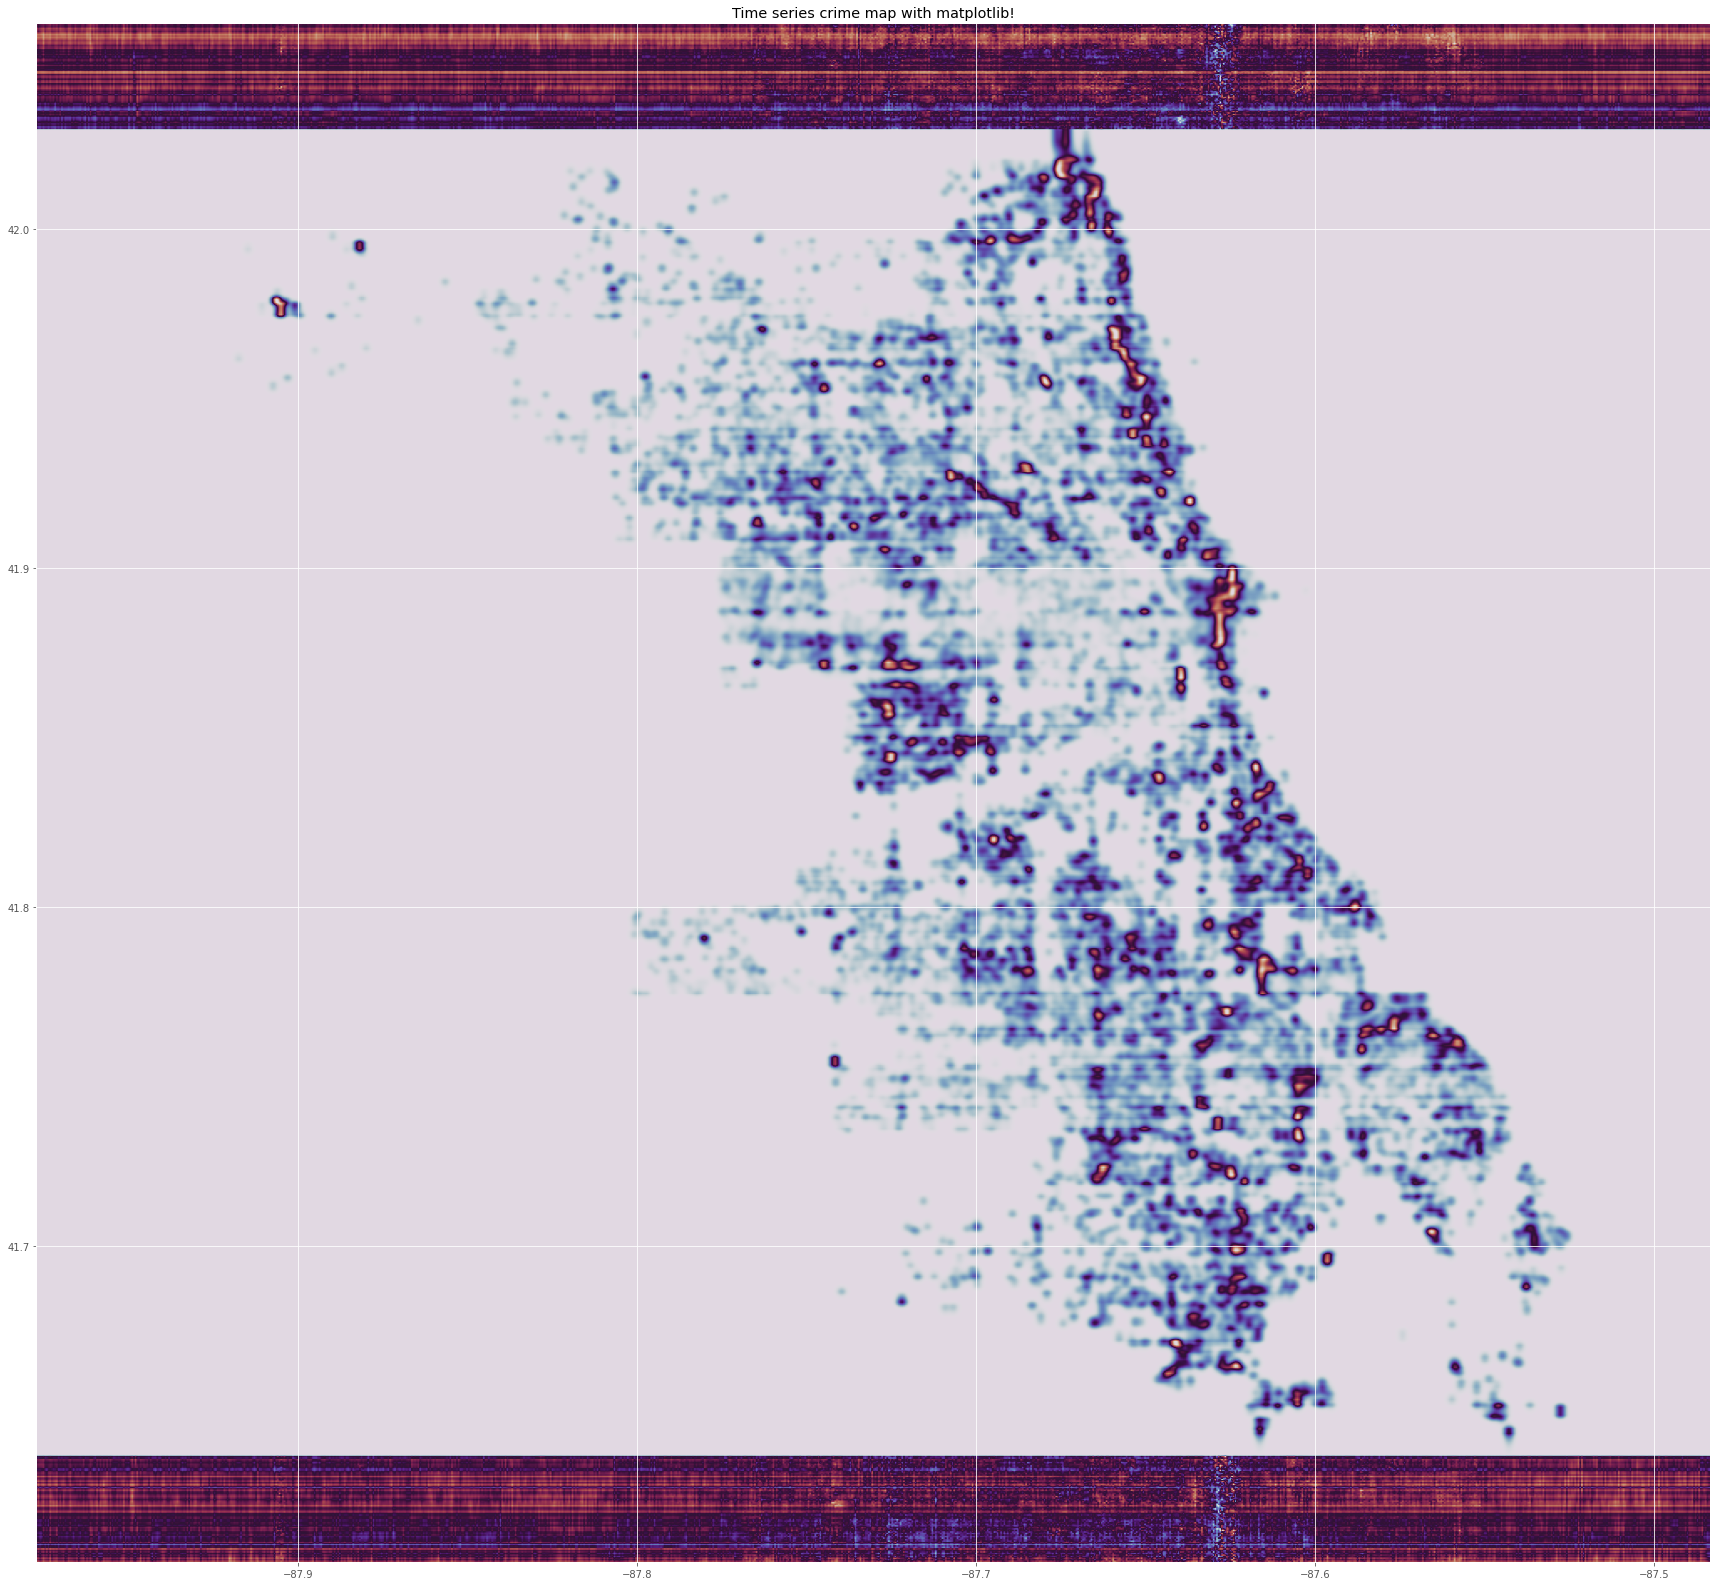

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000

df = map_arr[-1]
xdata = df["longitude"].dropna().to_numpy()
ydata = df["latitude"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))

print(xlim)
print(ylim)

plt.rcParams["figure.figsize"] = [30, 30]
fig1, ax1 = plt.subplots()
#ax1.scatter(x="LONGITUDE", y="LATITUDE", data=map_arr[frame_from_latest], c="red", alpha=0.4)
im = plt.imshow( X=iterable[0], cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])


# initialization function 
def init(): 
    # creating an empty plot/frame
    # print("in init")
    im.set_data(iterable[0])
    return [im]


# animation function 
def animate(i):
    #df = map_arr[i]
    #xdata = df["LONGITUDE"].dropna().to_numpy()
    #ydata = df["LATITUDE"].dropna().to_numpy()
    #np.rot90(data2[i])
    #print("in animate")
    im.set_data(iterable[i])
    return [im]

# setting a title for the plot 
plt.title('Time series crime map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
#anim = animation.FuncAnimation(fig1, animate, init_func=init,frames=np.arange(0,np.rot90(data2).shape[1],1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
#anim.save(CSV_PATH + 'crime_zone.gif', writer='imagemagick') 
#plt.show()

In [35]:
start_frame_date = min(map_arr[-1]['date'][map_arr[-1]['date'].notna()])
end_frame_date = max(map_arr[-1]['date'][map_arr[-1]['date'].notna()])
time_shift = 7 #days

In [36]:
offset = yy.shape[0]
print("offset = yy.shape[0]" + str(offset))
xx = xx.ravel()
yy = yy.ravel()
xdelta = abs(xx[1] - xx[1+offset])
ydelta = abs(yy[0] - yy[1+offset])
print("xdelta"+str(xdelta))
print("ydelta"+str(ydelta))
columns = [ 'start_date', 'end_date', 'poly_coordinate', 'density']

offset = yy.shape[0]1000
xdelta0.0004944144144189977
ydelta0.0004544144144134066


In [37]:
import rasterio
from rasterio.transform import Affine
from shapely.geometry import shape
from shapely.geometry import Polygon

In [38]:
min(xx), min(yy), max(xx), max(yy)

(-87.97726, 41.60687, -87.48334, 42.06083)

In [39]:
res = (xx[-1] - xx[0]) / 1000.0

In [40]:
Z = np.rot90(density_matrix_t_series[-2],1)

In [41]:
quantile_cutoff = .1
Z[Z < np.quantile(Z.flatten(), quantile_cutoff)] = np.quantile(Z.flatten(), quantile_cutoff)

#### Bin color in to discrete integers

In [42]:
numOfColor = 10
max_density = np.max(Z)
min_density = np.min(Z)
Z_int = (((Z-min_density)*numOfColor/(max_density - min_density))*255/numOfColor).astype('int32')

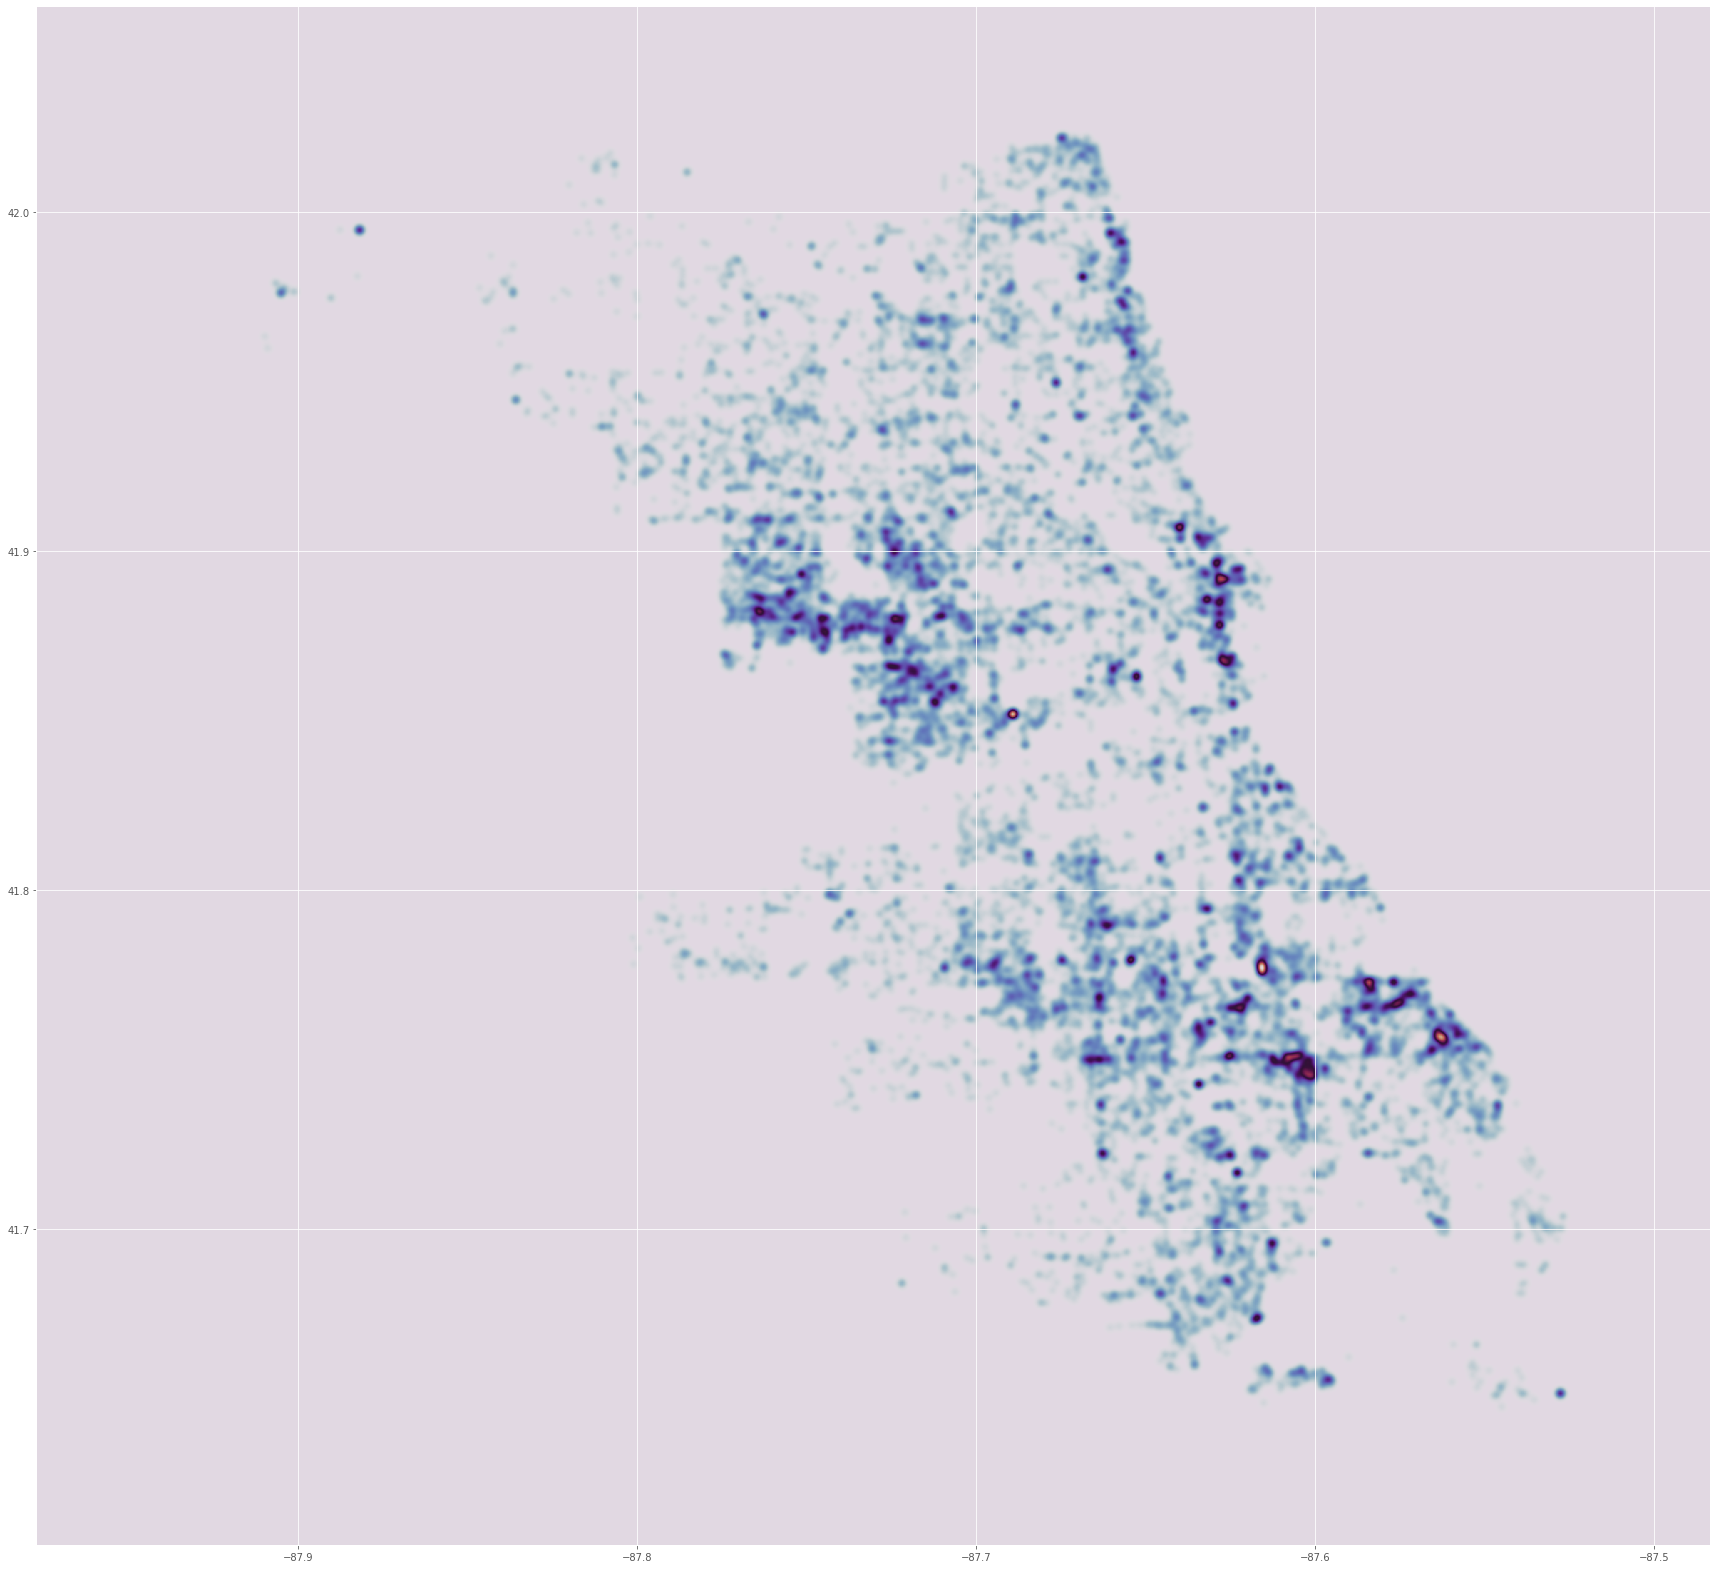

In [43]:
plt.imshow( X=Z_int, cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])

In [44]:
Z = Z_int

In [45]:
set(Z.flatten())

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 184,
 185,


In [46]:
transform = rasterio.transform.from_bounds(min(xx), min(yy), max(xx), max(yy), Z.shape[1], Z.shape[0])
transform

Affine(0.0004939200000000028, 0.0, -87.97726,
       0.0, -0.00045396000000000217, 42.06083)

In [47]:
from rasterio import features

results = ({'properties': {'raster_val': v}, 'geometry': s,'start_date':pd.to_datetime(start_frame_date) + timedelta(days=(time_shift*(1))),'end_date':pd.to_datetime(end_frame_date) + timedelta(days=(time_shift*(1)))}
        for i, (s, v)
        in enumerate(rasterio.features.shapes(Z,transform=transform)))

In [48]:
geoms = list(results)

In [49]:
geoms[0]

{'properties': {'raster_val': 1.0},
 'geometry': {'type': 'Polygon',
  'coordinates': [[(-87.67596879999999, 42.02496716),
    (-87.67596879999999, 42.0245132),
    (-87.67498096, 42.0245132),
    (-87.67498096, 42.02496716),
    (-87.67596879999999, 42.02496716)]]},
 'start_date': Timestamp('2020-04-06 23:55:00'),
 'end_date': Timestamp('2020-05-06 23:53:00')}

In [145]:
import geopandas as gp
gpd_polygonized_raster = gp.GeoDataFrame.from_features(geoms)

In [146]:
file_dir = "Boundaries - Wards (2015-).geojson"
wards_df = gp.read_file(file_dir)

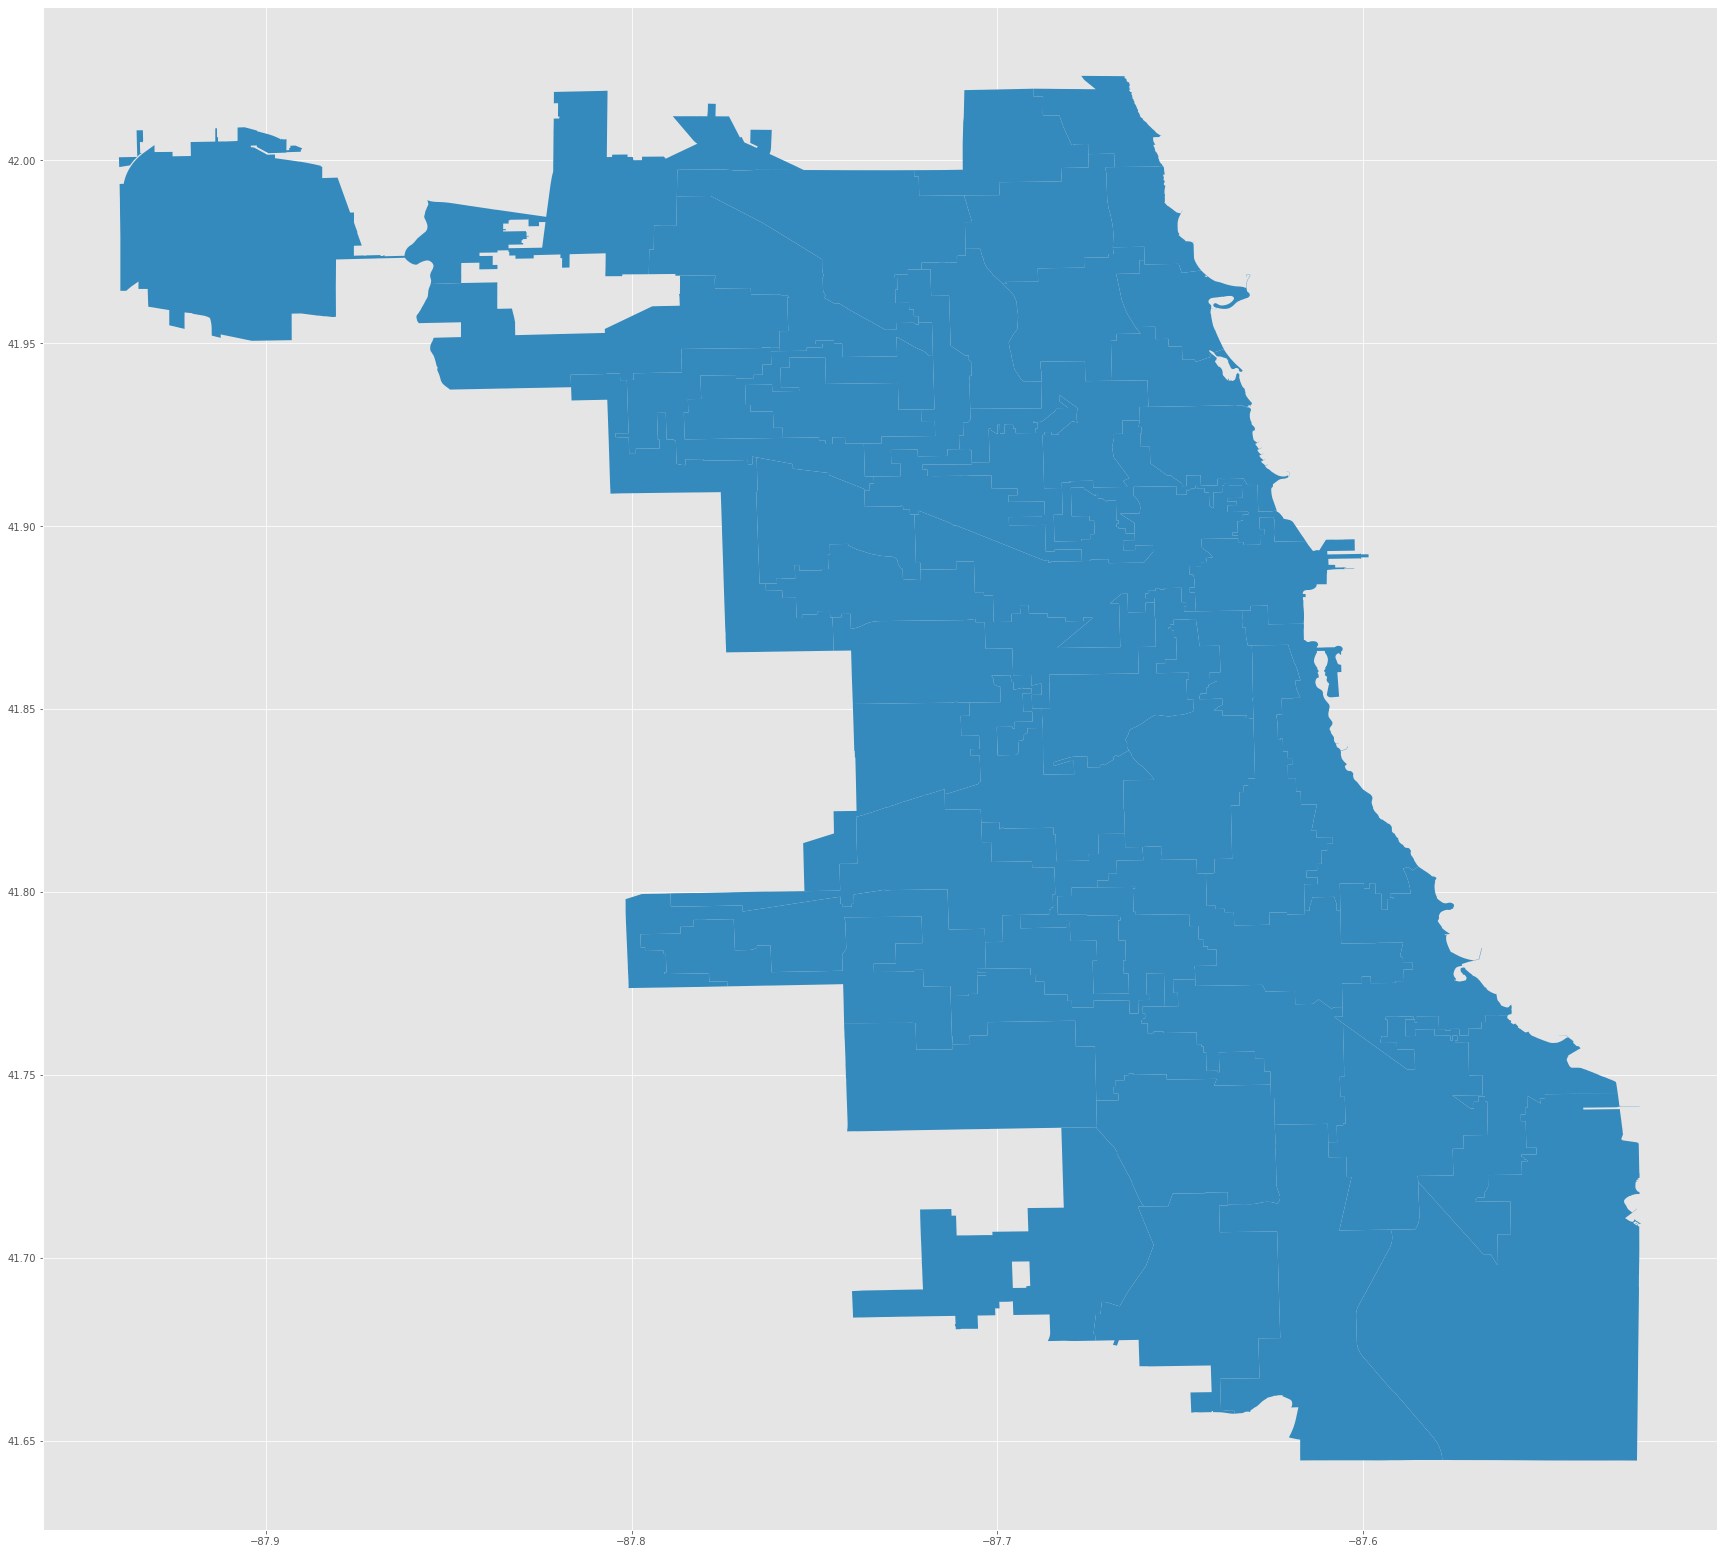

In [147]:
wards_df.plot()

In [148]:
wards_df.head()

shape_area     shape_leng ward  \
0  116096507.849  93073.3408379   12   
1  103143638.546  97901.3238332   16   
2   65588297.917  82183.6948197   15   
3   137290356.97  90105.1956185   20   
4  49733459.1385  38122.6928259   49   

                                            geometry  
0  MULTIPOLYGON (((-87.69623 41.85755, -87.69625 ...  
1  MULTIPOLYGON (((-87.66289 41.79884, -87.66289 ...  
2  MULTIPOLYGON (((-87.69818 41.81729, -87.69817 ...  
3  MULTIPOLYGON (((-87.65524 41.80883, -87.65524 ...  
4  MULTIPOLYGON (((-87.66420 42.02126, -87.66419 ...

In [149]:
wards_df.columns

Index(['shape_area', 'shape_leng', 'ward', 'geometry'], dtype='object')

In [150]:
gpd_polygonized_raster['ward'] = None

In [151]:
gpd_polygonized_raster.columns.get_loc("ward")

2

In [152]:
gpd_polygonized_raster

geometry  raster_val  ward
0       POLYGON ((-87.67597 42.02497, -87.67597 42.024...         1.0  None
1       POLYGON ((-87.67498 42.02497, -87.67498 42.024...         2.0  None
2       POLYGON ((-87.67350 42.02497, -87.67350 42.024...         1.0  None
3       POLYGON ((-87.67646 42.02451, -87.67646 42.024...         1.0  None
4       POLYGON ((-87.67597 42.02451, -87.67597 42.024...         3.0  None
...                                                   ...         ...   ...
153591  POLYGON ((-87.54557 41.64636, -87.54557 41.645...         3.0  None
153592  POLYGON ((-87.54409 41.64636, -87.54409 41.645...         2.0  None
153593  POLYGON ((-87.54360 41.64636, -87.54360 41.645...         1.0  None
153594  POLYGON ((-87.54607 41.64591, -87.54607 41.645...         1.0  None
153595  POLYGON ((-87.97726 42.06083, -87.97726 41.606...         0.0  None

[153596 rows x 3 columns]

In [153]:
def appendWard(row):
    boundbox = row['geometry']
    bb_df = gp.GeoSeries(boundbox)
    bool_within_bb = gpd_polygonized_raster.geometry.intersects(boundbox)
    index_within_bb = gpd_polygonized_raster[bool_within_bb].index
    c = row['ward']
    gpd_polygonized_raster.iloc[index_within_bb,gpd_polygonized_raster.columns.get_loc("ward")] = c
    print('curent ward is:' + str(c))
    print("count rows within count: " + str(len(index_within_bb)))
    print("-"*25)
    return (c, index_within_bb)

In [154]:
gpd_polygonized_raster["ward"] = None
list_of_index = wards_df.apply(appendWard, axis=1)

curent ward is:12
count rows within count: 3060
-------------------------
curent ward is:16
count rows within count: 3941
-------------------------
curent ward is:15
count rows within count: 2494
-------------------------
curent ward is:20
count rows within count: 4628
-------------------------
curent ward is:49
count rows within count: 1854
-------------------------
curent ward is:23
count rows within count: 3075
-------------------------
curent ward is:29
count rows within count: 3842
-------------------------
curent ward is:14
count rows within count: 3004
-------------------------
curent ward is:3
count rows within count: 4215
-------------------------
curent ward is:4
count rows within count: 3564
-------------------------
curent ward is:2
count rows within count: 2035
-------------------------
curent ward is:35
count rows within count: 2122
-------------------------
curent ward is:21
count rows within count: 4811
-------------------------
curent ward is:24
count rows within count

In [155]:
gpd_polygonized_raster.head()

geometry  raster_val  ward
0  POLYGON ((-87.67597 42.02497, -87.67597 42.024...         1.0  None
1  POLYGON ((-87.67498 42.02497, -87.67498 42.024...         2.0  None
2  POLYGON ((-87.67350 42.02497, -87.67350 42.024...         1.0  None
3  POLYGON ((-87.67646 42.02451, -87.67646 42.024...         1.0  None
4  POLYGON ((-87.67597 42.02451, -87.67597 42.024...         3.0  None

In [156]:
gpd_polygonized_raster = gpd_polygonized_raster.dissolve(by=['ward','raster_val'])

In [157]:
pd.DataFrame(list(gpd_polygonized_raster.index), columns=['ward','raster_val'])

ward  raster_val
0       1         0.0
1       1         1.0
2       1         2.0
3       1         3.0
4       1         4.0
...   ...         ...
4791    9       128.0
4792    9       129.0
4793    9       130.0
4794    9       132.0
4795    9       139.0

[4796 rows x 2 columns]

In [134]:
#gpd_polygonized_raster[['ward','raster_val']] = pd.DataFrame(list(gpd_polygonized_raster.index), columns=['ward','raster_val'])

In [158]:
gpd_polygonized_raster

geometry
ward raster_val                                                   
1    0.0         MULTIPOLYGON (((-87.67844 41.89513, -87.67844 ...
     1.0         MULTIPOLYGON (((-87.67597 41.89241, -87.67498 ...
     2.0         MULTIPOLYGON (((-87.67498 41.89241, -87.67449 ...
     3.0         MULTIPOLYGON (((-87.67646 41.89196, -87.67597 ...
     4.0         MULTIPOLYGON (((-87.66362 41.89150, -87.66313 ...
...                                                            ...
9    128.0       MULTIPOLYGON (((-87.61769 41.67360, -87.61769 ...
     129.0       POLYGON ((-87.62312 41.71673, -87.62312 41.716...
     130.0       POLYGON ((-87.61719 41.67360, -87.61719 41.673...
     132.0       POLYGON ((-87.61769 41.67406, -87.61769 41.673...
     139.0       POLYGON ((-87.61719 41.67406, -87.61719 41.673...

[4796 rows x 1 columns]

In [159]:
gpd_polygonized_raster["geometry"] = gpd_polygonized_raster["geometry"].simplify(0)

In [69]:
#gpd_polygonized_raster[["geometry","raster_val"]].plot(column='raster_val',figsize=(10,10))

In [140]:
pd.DataFrame(list(gpd_polygonized_raster.index), columns=['ward','raster_val']).describe('')

raster_val
count  4796.000000
mean     55.652419
std      41.428667
min       0.000000
25%      24.000000
50%      48.000000
75%      78.000000
max     255.000000

In [160]:
gpd_polygonized_raster['start_date'] = pd.to_datetime(start_frame_date) + timedelta(days=(time_shift*(1)))
gpd_polygonized_raster['end_date'] = pd.to_datetime(end_frame_date) + timedelta(days=(time_shift*(1)))

In [162]:
gpd_polygonized_raster.rename(columns={'raster_val': 'density'}, inplace=True)

In [163]:
gpd_polygonized_raster

geometry  \
ward raster_val                                                      
1    0.0         MULTIPOLYGON (((-87.67844 41.89513, -87.67844 ...   
     1.0         MULTIPOLYGON (((-87.67597 41.89241, -87.67498 ...   
     2.0         MULTIPOLYGON (((-87.67498 41.89241, -87.67449 ...   
     3.0         MULTIPOLYGON (((-87.67646 41.89196, -87.67597 ...   
     4.0         MULTIPOLYGON (((-87.66362 41.89150, -87.66313 ...   
...                                                            ...   
9    128.0       MULTIPOLYGON (((-87.61769 41.67360, -87.61769 ...   
     129.0       POLYGON ((-87.62312 41.71673, -87.62312 41.716...   
     130.0       POLYGON ((-87.61719 41.67360, -87.61719 41.673...   
     132.0       POLYGON ((-87.61769 41.67406, -87.61769 41.673...   
     139.0       POLYGON ((-87.61719 41.67406, -87.61719 41.673...   

                         start_date            end_date  
ward raster_val                                          
1    0.0        2020-04-06 23:55:00 2020-05-06 23:53:00  
     1.0        2020-04-06 23:55:00 2020-05-06 23:53:00  
     2.0        2020-04-06 23:55:00 2020-05-06 23:53:00  
     3.0        2020-04-06 23:55:00 2020-05-06 23:53:00  
     4.0        2020-04-06 23:55:00 2020-05-06 23:53:00  
...                             ...                 ...  
9    128.0      2020-04-06 23:55:00 2020-05-06 23:53:00  
     129.0      2020-04-06 23:55:00 2020-05-06 23:53:00  
     130.0      2020-04-06 23:55:00 2020-05-06 23:53:00  
     132.0      2020-04-06 23:55:00 2020-05-06 23:53:00  
     139.0      2020-04-06 23:55:00 2020-05-06 23:53:00  

[4796 rows x 3 columns]

In [164]:
gpd_polygonized_raster.to_file("/home/zhimin90/DePaul/DSC468/Experiment/Crime_2020_lowres.geojson", driver='GeoJSON')

ERROR:fiona._env:/home/zhimin90/DePaul/DSC468/Experiment/Crime_2020_lowres.geojson: No such file or directory
